### Задание

In [5]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [114]:
import warnings
warnings.filterwarnings('ignore')

 #### 1. Сгенерируйте данные.

In [2]:
from sklearn.datasets import make_classification

x_generated, y_generated = make_classification(scale=1)

#### 2. Постройте модель логистической регрессии и оцените среднюю точность.

In [55]:
from sklearn.model_selection import cross_val_score

accuracy_before_feature_selection = cross_val_score(LogisticRegression(),
                                                    x_generated,
                                                    y_generated,
                                                    scoring='accuracy').mean()

print(f"Accuracy before feature selection: {accuracy_before_feature_selection:.2f}")

Accuracy before feature selection: 0.90


#### 3. Используйте статистические методы для отбора признаков.

##### a) Выберите признаки на основе матрицы корреляции.

In [58]:
# Вычисление корреляционной матрицы
feature_data = pd.DataFrame(x_generated)
correlation_matrix = feature_data.corr()

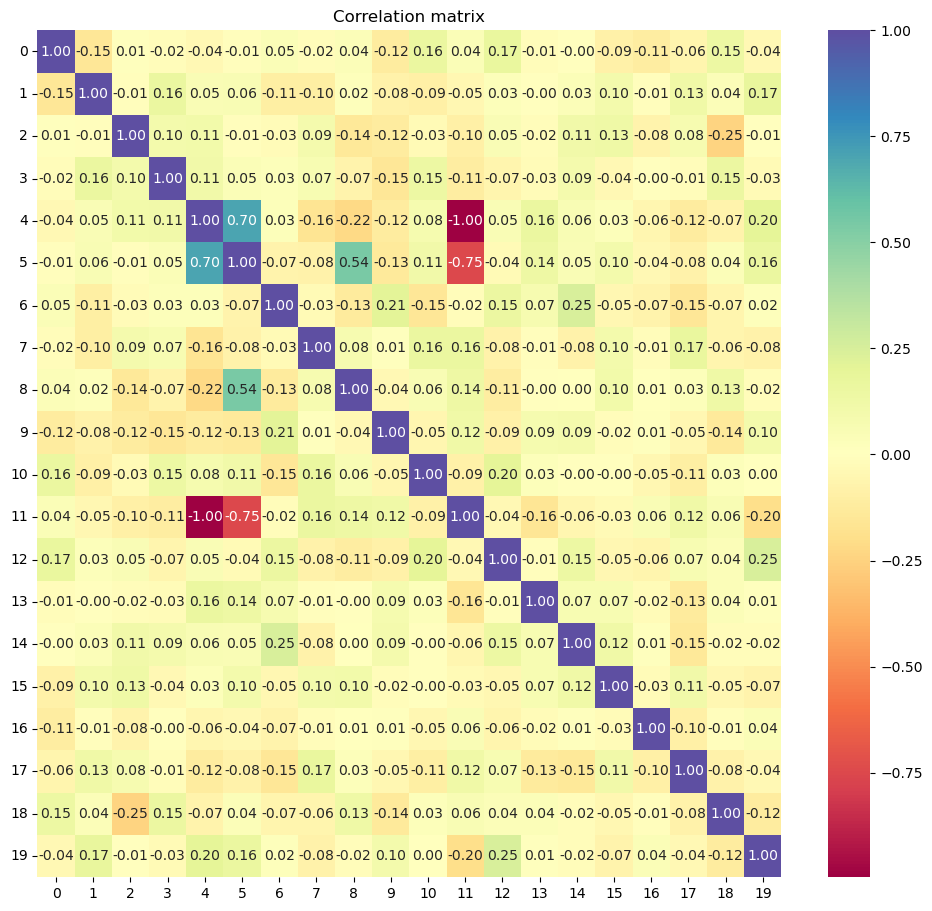

In [59]:
# Построение тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.yticks(rotation=0)
plt.title('Correlation matrix')
plt.show()

Из полученной матрицы корреляции можем выделить пары признаков, между которыми наблюдается сильная корреляция: 4 и 5, 4 и 11, 5 и 11. Попробуем удалить признаки 5 и 11, чтобы избежать мультиколлинеарности.

In [129]:
feature_data_corr = feature_data.drop([5, 11], axis=1)

In [130]:
feature_data_corr.shape

(100, 18)

##### b) Отсеките низковариативные признаки (VarianceThreshold).

In [61]:
from sklearn.feature_selection import VarianceThreshold

variance_threshold = VarianceThreshold(threshold=1)

In [131]:
feature_data_variance = variance_threshold.fit_transform(x_generated)

In [132]:
feature_data_variance.shape

(100, 10)

##### c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [78]:
accuracy_after_feature_selection_corr = cross_val_score(LogisticRegression(),
                                                        data_corr_filtered,
                                                        y_generated,
                                                        scoring='accuracy').mean()

print(f'Accuracy after feature selection (Correlation): {accuracy_after_feature_selection_corr:.2f}')

Accuracy after feature selection (Correlation): 0.89


In [125]:
accuracy_after_feature_selection_variance = cross_val_score(LogisticRegression(),
                                                            data_variance_filtered,
                                                            y_generated,
                                                            scoring='accuracy').mean()

print(f'Accuracy after feature selection (Variance): {accuracy_after_feature_selection_variance:.2f}')

Accuracy after feature selection (Variance): 0.90


#### 4. Осуществите отбор признаков на основе дисперсионного анализа.

##### a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации `f_classif`.

In [57]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best_selector = SelectKBest(f_classif, k=5)

In [71]:
feature_data_kbest = k_best_selector.fit_transform(x_generated, y_generated)

In [73]:
feature_data_kbest.shape

(100, 5)

##### b) Повторите п. 2 на отобранных признаках.

In [118]:
accuracy_after_feature_selection_kbest = cross_val_score(LogisticRegression(),
                                                         feature_data_kbest,
                                                         y_generated,
                                                         scoring='accuracy').mean()

print(f"Accuracy after feature selection (Select K-Best): {accuracy_after_feature_selection_kbest}")

Accuracy after feature selection (Select K-Best): 0.93


#### 5. Отбор с использованием моделей.

##### a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (`SelectFromModel`). Используйте L1 регуляризацию.

In [79]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

logreg_selector = SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear"))

In [80]:
feature_data_logreg = logreg_selector.fit_transform(x_generated, y_generated)

In [83]:
feature_data_logreg.shape

(100, 13)

##### b) Реализуйте отбор признаков с помощью модели `RandomForest` и встроенного атрибута `feature_impotance`.

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [90]:
rf_model.fit(x_generated, y_generated)

RandomForestClassifier()

In [91]:
importance_rf = rf_model.feature_importances_

In [94]:
rf_selector = SelectFromModel(rf_model, threshold=np.mean(importance_rf))

In [96]:
feature_data_rf = rf_selector.transform(x_generated)

In [99]:
feature_data_rf.shape

(100, 2)

##### c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [104]:
accuracy_after_feature_selection_logreg = cross_val_score(LogisticRegression(),
                                                          feature_data_logreg,
                                                          y_generated,
                                                          scoring='accuracy').mean()

print(f'Accuracy after feature selection (Logistic Regression): {accuracy_after_feature_selection_variance:.2f}')

Accuracy after feature selection (Logistic Regression): 0.90


In [105]:
accuracy_after_feature_selection_rf = cross_val_score(LogisticRegression(),
                                                      feature_data_rf,
                                                      y_generated,
                                                      scoring='accuracy').mean()

print(f'Accuracy after feature selection (Random Forest): {accuracy_after_feature_selection_rf:.2f}')

Accuracy after feature selection (Random Forest): 0.92


#### 6. Перебор признаков.

##### a) SequentialFeatureSelector.

In [110]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LogisticRegression())

In [115]:
feature_data_sfs = sfs.fit_transform(x_generated, y_generated)

In [116]:
feature_data_sfs.shape

(100, 10)

##### b) Повторите п. 2 на отобранных признаках.

In [113]:
accuracy_after_feature_selection_sfs = cross_val_score(LogisticRegression(),
                                                       feature_data_sfs,
                                                       y_generated,
                                                       scoring='accuracy').mean()

print(f"Accuracy after feature selection (Sequential Feature Selection): {accuracy_after_feature_selection_sfs:.2f}")

Accuracy after feature selection (Sequential Feature Selection): 0.94


#### 7. Сформулируйте выводы по проделанной работе: cделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [122]:
data = {
    'Feature selection method': [
        'Unselected',
        'Correlation',
        'Variance',
        'Select K-Best',
        'Logistic Regression',
        'Random Forest',
        'Sequential Feature Selection'
    ],
    'Number of features': [20, 18, 10, 5, 13, 2, 10],
    'Average model accuracy': [0.90, 0.89, 0.90, 0.93, 0.90, 0.92, 0.94]
}

df = pd.DataFrame(data)

print(df)

       Feature selection method  Number of features  Average model accuracy
0                    Unselected                  20                    0.90
1                   Correlation                  18                    0.89
2                      Variance                  10                    0.90
3                 Select K-Best                   5                    0.93
4           Logistic Regression                  13                    0.90
5                 Random Forest                   2                    0.92
6  Sequential Feature Selection                  10                    0.94


Применение различных методов отбора признаков в машинном обучении имеет ключевое значение для ряда целей:

1. **Улучшение производительности модели:** Выбор наиболее информативных признаков позволяет снизить размерность данных, уменьшить шум и избежать переобучения. Это может значительно улучшить производительность модели, особенно при наличии ограниченных ресурсов.

2. **Борьба с переобучением:** Сокращение количества признаков помогает предотвратить переобучение, когда модель слишком точно подстраивается под обучающие данные и теряет способность обобщения на новые, ранее не виденные данные.

3. **Эффективность вычислений:** Уменьшение размерности признакового пространства ускоряет обучение моделей, что особенно важно в случае больших объёмов данных. Это также снижает требования к вычислительным ресурсам.

4. **Лучшее понимание данных:** Отбор признаков помогает выявить наиболее важные аспекты данных, что способствует более глубокому пониманию процессов, лежащих в основе модели.

5. **Улучшение интерпретируемости:** Модели с меньшим числом признаков легче интерпретировать.